In [11]:
import numpy as np
from boltons.statsutils import Stats
from pprint import pprint


def run_experiments(p, bet_amount,
                    num_bets=100, num_experiments=1000,
                    transaction_cost_percent=0.05):
    
    # single run of "coin flip"
    
    experiment_scores = []
    for experiment in range(num_experiments):
        cash = 1.0
        for i in range(num_bets):
            trial_result = np.random.binomial(n=1, p=p)
            
            transaction_cost = bet_amount * transaction_cost_percent

            win_amount = bet_amount * cash 
            lose_amount = bet_amount * cash 

            if trial_result == 1:
                cash = cash + win_amount - transaction_cost
            elif trial_result == 0:
                cash = cash - lose_amount - transaction_cost
            else:
                raise ValueError()
                
        if num_experiments < 7:
            print(f"ex{experiment}: {cash}$ after {num_bets} bets at p={p}")
            
        experiment_scores.append(cash)
    stats = Stats(experiment_scores)
    #print(stats.describe(format='text'))
    #print()

    return stats, experiment_scores
    

In [12]:


import pandas as pd
from tqdm import tqdm

summary_df, df = None, None 
bet_amounts = np.linspace(0.01, 0.5, 11)
probabilities = np.linspace(0.4, 0.6, 11)

for bet_amount in tqdm(bet_amounts):
    for p in probabilities:
        stats, scores = run_experiments(p, bet_amount=bet_amount)
        rows = [
            {"p": p, "score": s, "bet_amount": bet_amount} for s in scores
        ]
        summary_dict = {"p": p, "score": stats.median, "bet_amount": bet_amount}
        summary_dict.update(
                {"q" + str(num): stats.get_quantile(num/100) for  num in range(0, 101, 10)}
        )
        summary_rows = [summary_dict]
        
        if df is None:
            df = pd.DataFrame(rows)
        else:
            df = pd.concat([df, pd.DataFrame(rows)])
            
        if summary_df is None:
            summary_df = pd.DataFrame(summary_rows)
        else:
            summary_df = pd.concat([summary_df, pd.DataFrame(summary_rows)])

summary_df.reset_index(drop=True, inplace=True)
df

100%|██████████| 11/11 [00:42<00:00,  3.84s/it]


,p,score,bet_amount
0,0.4,0.925934,0.01
1,0.4,0.695584,0.01
2,0.4,0.724239,0.01
3,0.4,0.739221,0.01
4,0.4,0.694135,0.01
...,...,...,...
995,0.6,-0.440219,0.50
996,0.6,-1.137783,0.50
997,0.6,-202.984660,0.50
998,0.6,-347.256459,0.50


In [13]:
summary_df

,p,score,bet_amount,q0,q10,q20,q30,q40,q50,q60,q70,q80,q90,q100
0,0.40,0.769513,0.01,0.551130,0.678790,0.708271,0.724936,0.752908,0.769513,0.786343,0.818203,0.851323,0.887672,1.028775
1,0.42,0.802136,0.01,0.551314,0.707371,0.737368,0.755144,0.785017,0.802136,0.819882,0.851912,0.870807,0.907947,1.138584
2,0.44,0.834484,0.01,0.599900,0.737674,0.768079,0.787446,0.816778,0.834484,0.852811,0.871522,0.907517,0.945137,1.135344
3,0.46,0.870849,0.01,0.613338,0.768121,0.801660,0.833468,0.852721,0.870849,0.889959,0.923521,0.945903,0.985662,1.286659
4,0.48,0.907210,0.01,0.666075,0.801450,0.835294,0.867736,0.887554,0.907210,0.927787,0.963961,0.986002,1.046386,1.317167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.52,-0.390556,0.50,-1818.264298,-3.084686,-1.339350,-0.766429,-0.549002,-0.390556,-0.289463,-0.203965,-0.149237,-0.100487,63.041534
117,0.54,-0.410029,0.50,-17611.564353,-4.662104,-1.714714,-0.950974,-0.596815,-0.410029,-0.291359,-0.213327,-0.152193,-0.098244,33.426389
118,0.56,-0.518984,0.50,-1170.197301,-6.420185,-2.545315,-1.264125,-0.767459,-0.518984,-0.374383,-0.252648,-0.171350,-0.106629,2550.053211
119,0.58,-0.804041,0.50,-30767.132396,-16.092562,-5.158153,-2.179424,-1.289039,-0.804041,-0.546315,-0.331266,-0.197683,-0.099235,8965.186703


  0%|          | 0/11 [00:00<?, ?it/s]

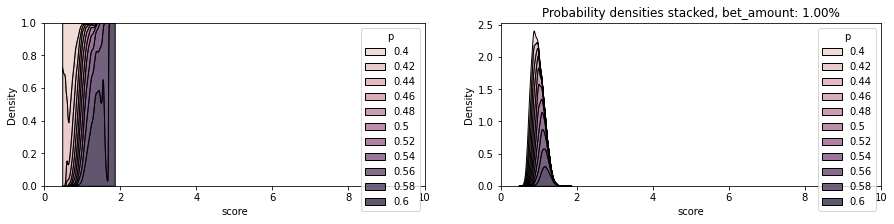

  9%|▉         | 1/11 [00:00<00:06,  1.48it/s]

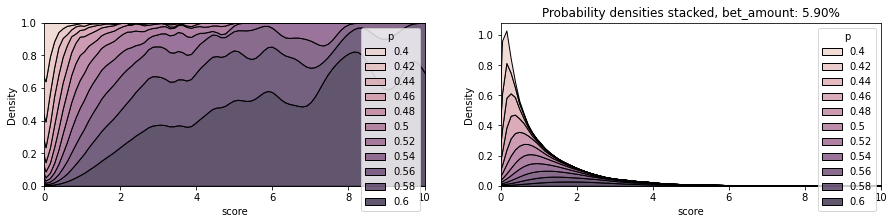

 18%|█▊        | 2/11 [00:01<00:06,  1.34it/s]

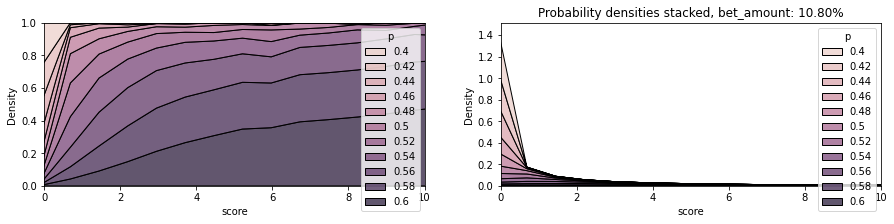

 27%|██▋       | 3/11 [00:02<00:05,  1.50it/s]

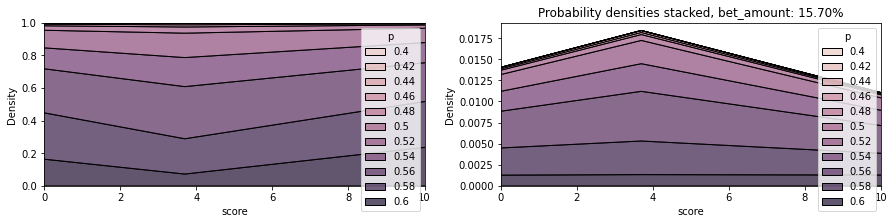

 36%|███▋      | 4/11 [00:02<00:04,  1.62it/s]

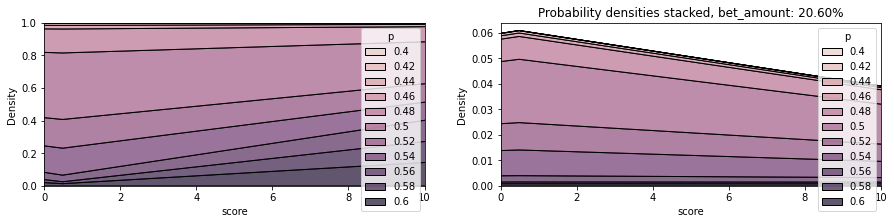

 45%|████▌     | 5/11 [00:03<00:03,  1.70it/s]

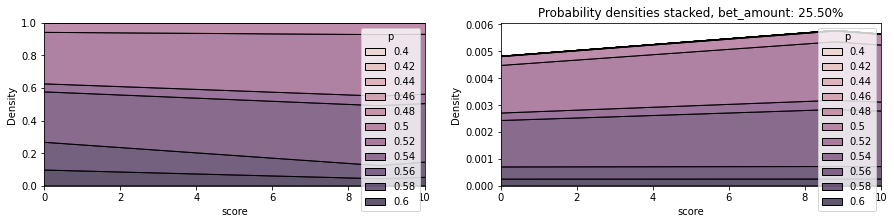

 55%|█████▍    | 6/11 [00:03<00:02,  1.70it/s]

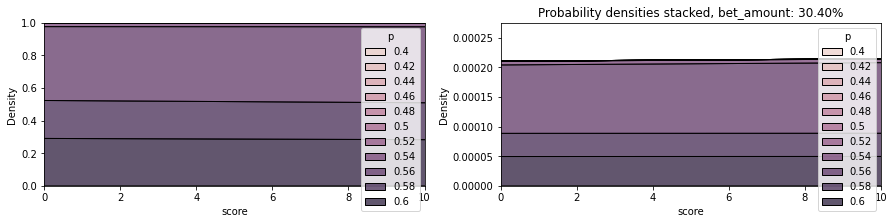

 64%|██████▎   | 7/11 [00:04<00:02,  1.67it/s]

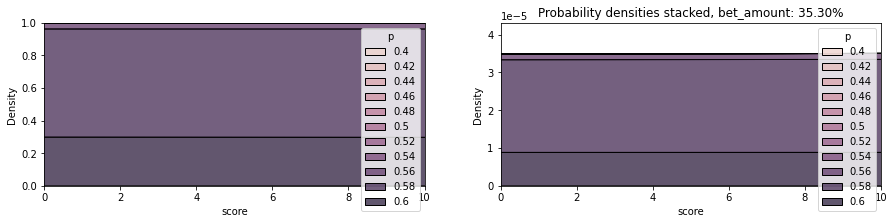

 73%|███████▎  | 8/11 [00:04<00:01,  1.71it/s]

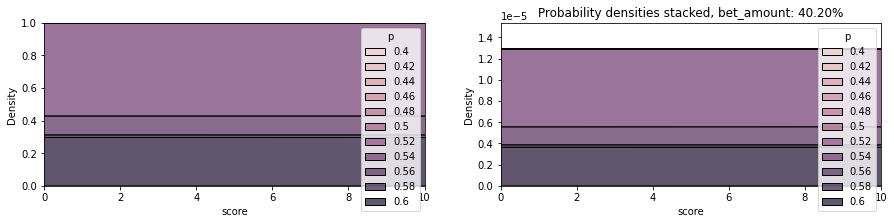

 82%|████████▏ | 9/11 [00:05<00:01,  1.74it/s]

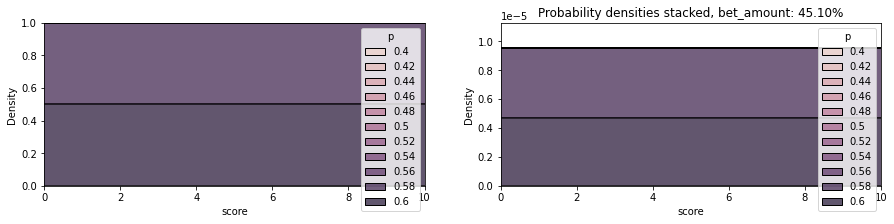

 91%|█████████ | 10/11 [00:05<00:00,  1.80it/s]

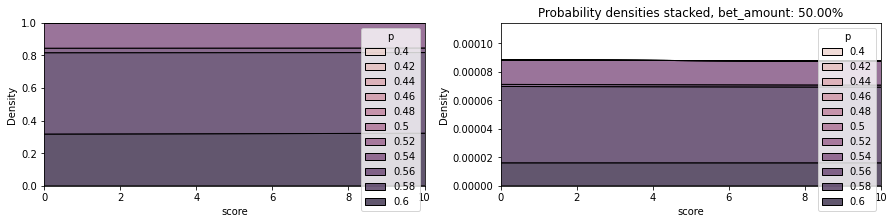

100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

for bet_amount_unique in tqdm(df.bet_amount.unique()):
    fig, axs = plt.subplots(1,2, figsize=(15, 3))
    for ax in axs:
        ax.set_xlim([0, 10])
        # ax.set_ylim([0, 1])
    ax1, ax2 = axs

    sns.kdeplot(data=df[df.bet_amount == bet_amount_unique].round(3), x="score", 
                hue="p", multiple="fill", ax=ax1)
    plt.title(f"Probability densities, bet_amount: {(bet_amount_unique * 100):.2f}%")

    
    sns.kdeplot(data=df[df.bet_amount == bet_amount_unique].round(3), x="score", 
                hue="p", multiple="stack", ax=ax2)
    plt.title(f"Probability densities stacked, bet_amount: {(bet_amount_unique * 100):.2f}%")
    plt.show()



  0%|          | 0/11 [00:00<?, ?it/s]

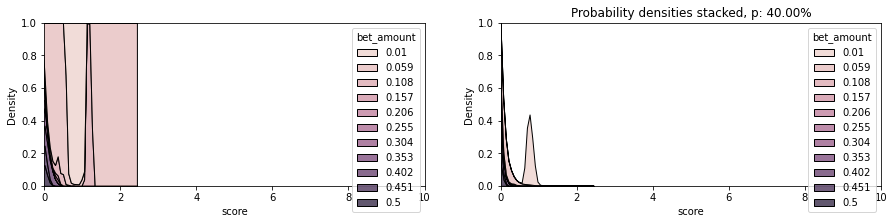

  9%|▉         | 1/11 [00:00<00:06,  1.56it/s]

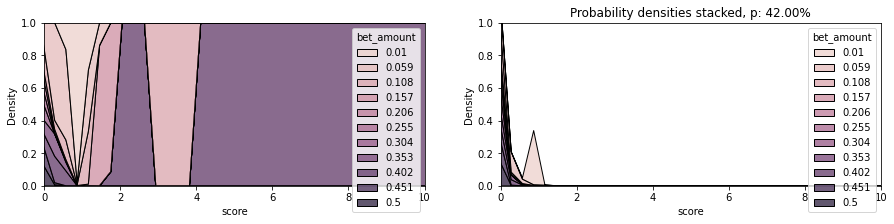

 18%|█▊        | 2/11 [00:01<00:05,  1.54it/s]

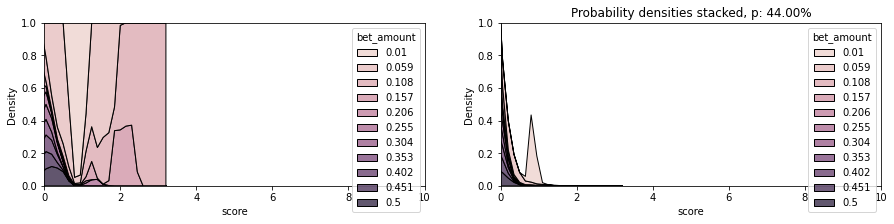

 27%|██▋       | 3/11 [00:01<00:04,  1.63it/s]

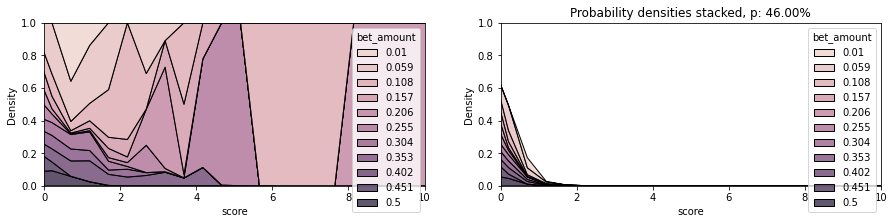

 36%|███▋      | 4/11 [00:02<00:04,  1.65it/s]

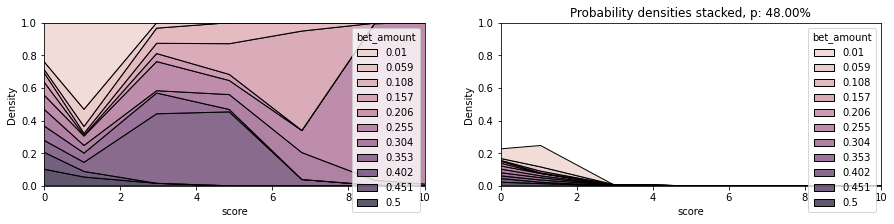

 45%|████▌     | 5/11 [00:03<00:03,  1.68it/s]

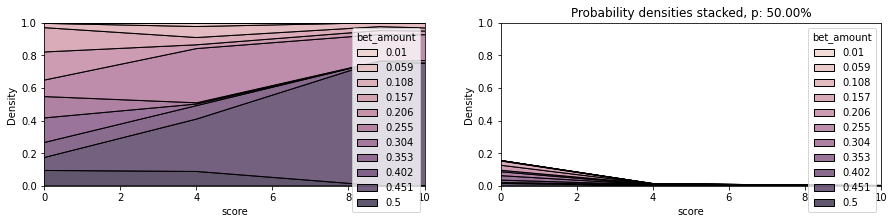

 55%|█████▍    | 6/11 [00:03<00:02,  1.71it/s]

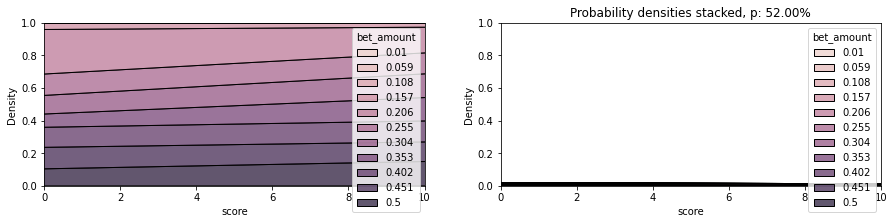

 64%|██████▎   | 7/11 [00:04<00:02,  1.65it/s]

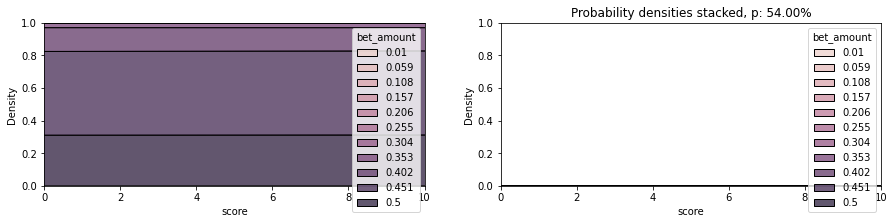

 73%|███████▎  | 8/11 [00:04<00:01,  1.66it/s]

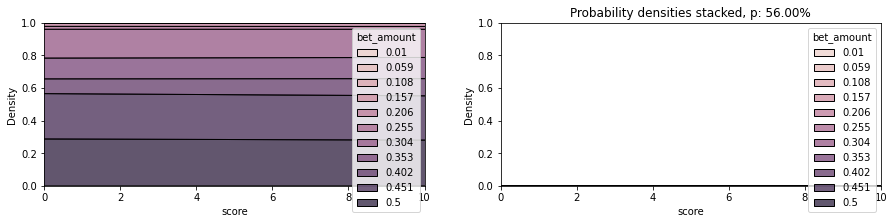

 82%|████████▏ | 9/11 [00:05<00:01,  1.68it/s]

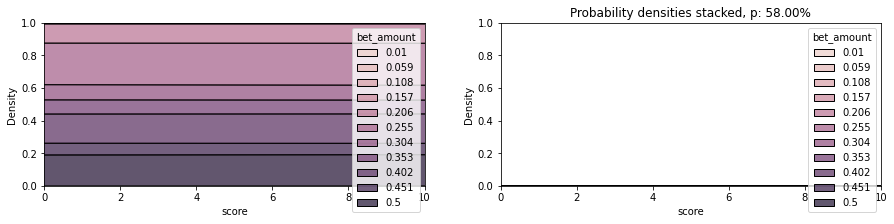

 91%|█████████ | 10/11 [00:05<00:00,  1.71it/s]

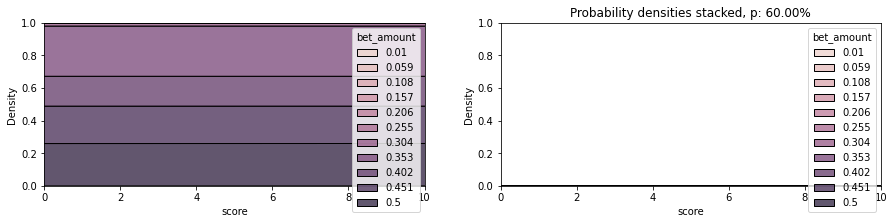

100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


In [15]:
    
for p_unique in tqdm(df.p.unique()):
    fig, axs = plt.subplots(1,2, figsize=(15, 3))
    for ax in axs:
        ax.set_xlim([0, 10])
    ax1, ax2 = axs
    
    sns.kdeplot(data=df[df.p == p_unique].round(3), x="score", 
                hue="bet_amount", multiple="fill", ax=ax1)
    plt.title(f"Probability densities, p: {(p_unique * 100):.2f}%")
    
    plt.xlim([0,10])
    plt.ylim([0,1])
    
    sns.kdeplot(data=df[df.p == p_unique].round(3), x="score", 
                hue="bet_amount", multiple="stack", ax=ax2)
    plt.title(f"Probability densities stacked, p: {(p_unique * 100):.2f}%")
    
    plt.xlim([0,10])
    plt.ylim([0,1])
    plt.show()

Text(0.5, 1.0, '90th Quantile, lucky')

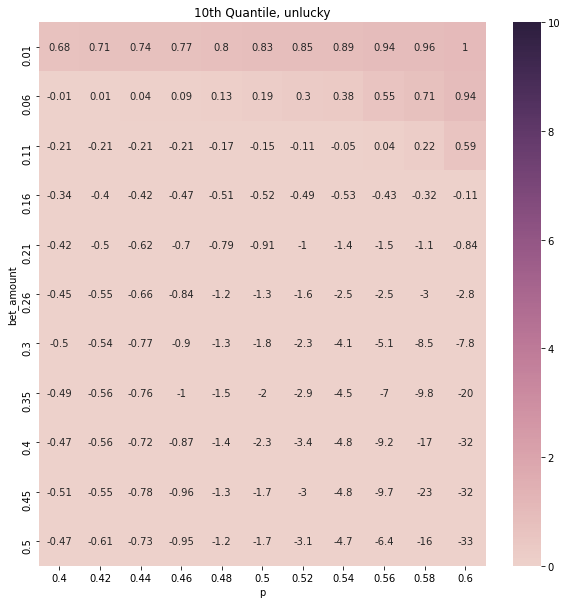

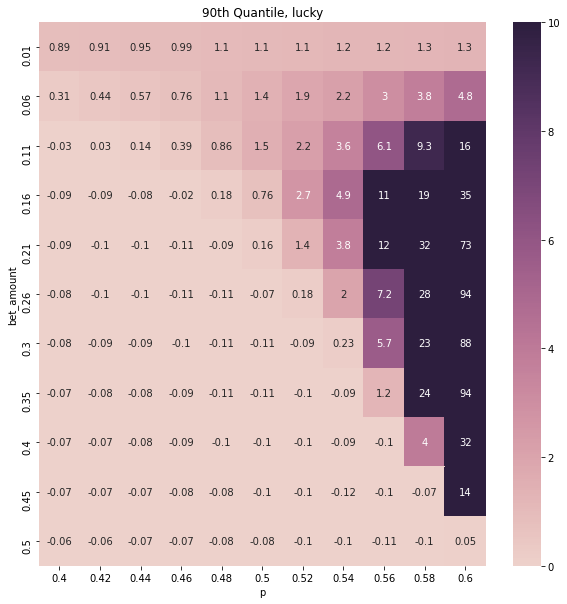

In [16]:

plt.figure(figsize=(10,10))
sns.heatmap(summary_df.round(2).pivot("bet_amount", "p", "q10"), vmax=10, vmin=0, annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("10th Quantile, unlucky")

plt.figure(figsize=(10,10))
sns.heatmap(summary_df.round(2).pivot("bet_amount", "p", "q90"), vmax=10, vmin=0, annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("90th Quantile, lucky")

Text(0.5, 1.0, '90th Percentile, lucky')

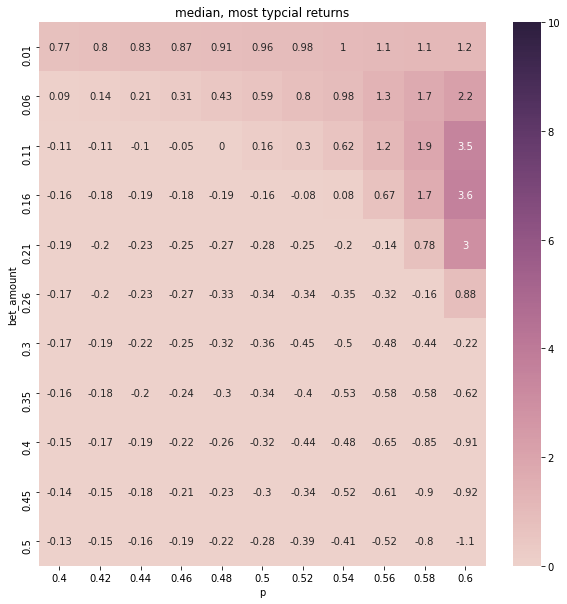

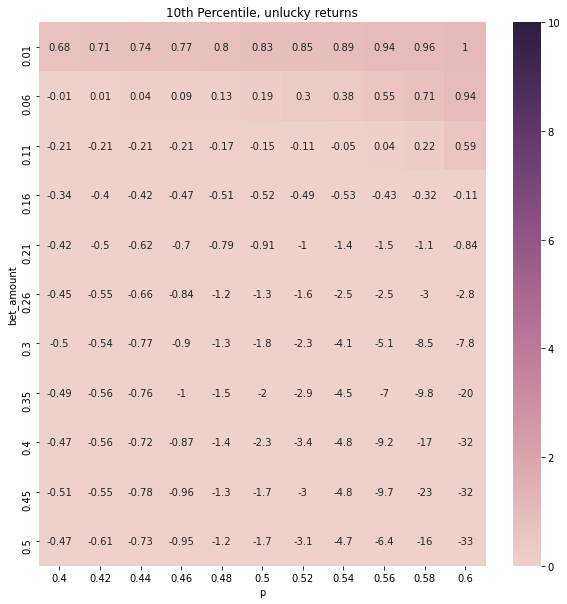

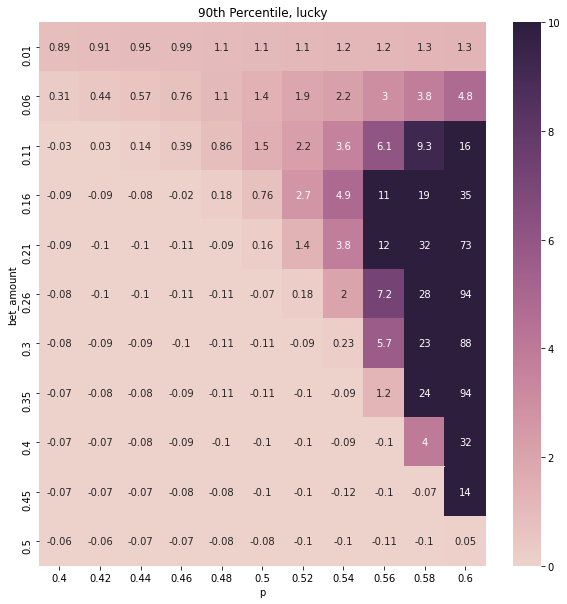

In [17]:

plt.figure(figsize=(10,10))
sns.heatmap(summary_df.round(2).pivot("bet_amount", "p", "score"), vmax=10, vmin=0, annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("median, most typcial returns")

plt.figure(figsize=(10,10))
sns.heatmap(summary_df.round(2).pivot("bet_amount", "p", "q10"), vmax=10, vmin=0, annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("10th Percentile, unlucky returns")


plt.figure(figsize=(10,10))
sns.heatmap(summary_df.round(2).pivot("bet_amount", "p", "q90"), vmax=10, vmin=0, annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("90th Percentile, lucky")

